# BIOS512 Assignment #3

Import the 📈Tidyverse into your `R` session

In [2]:
library('tidyverse')

In this assignment we'll be using data from the [TidyTuesday Project](https://github.com/rfordatascience/tidytuesday). Specifically, we'll investigate vaccination rates at US schools. A `CSV` file of the data is located at:  

[https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-25/measles.csv]()

Get the "raw" data URL and import it into your `R` session using `read_csv`. Remember to capture the data under a variable name of your choosing!

In [3]:
measles <- read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-02-25/measles.csv',
                   col_types=cols())

The `mmr` column has holds 🤒 measles, mumps, rubella 🤒 vaccination rates for students in each respective school. **If the `mmr` value is not available for a school the `mmr` value is set to -1 in this data set.** 

The target `mmr` vaccination rate as [recommended by the CDC](https://www.cdc.gov/mmwr/preview/mmwrhtml/mm5632a3.htm) for schools is 95%. 

**Calculate the fraction of schools per state that have vaccination rates greater than the CDC 95%. Capture the output as a table called `df_vacc_rates`.**

You'll need to do use `filter`, `group_by`, and `summarize`. 

I.e.
1. Filter out schools that don't report `mmr` vaccination rate (keep schools where `mmr >= 0`).
1. Group the data by `state`.
1. Summarize fracion of vaccination rates above 95%.

💡Remember `n()` stands for the number or records in a group. Also, `sum(mmr >= 95, na.rm=TRUE)` will count the number of values above or equal to 95.💡

In [23]:
# create the df_vacc_rates here
df_vacc_rates <- measles %>%
                 select(mmr, state) %>%
                 group_by(state) %>%
                 filter(mmr>=0) %>%
                 summarize(frac_vaccine = sum(mmr>=95, na.rm=TRUE)/n())

df_vacc_rates %>% head

# df_vacc_rates_2 <- measles %>%
#                    select(mmr, state) %>%
#                    filter(mmr>=0) %>%
#                    group_by(state) %>%
#                    mutate(frac_vaccine = sum(mmr >= 95, na.rm=TRUE)/n()) %>%
#                    distinct(state, .keep_all=TRUE) %>%
#                    select(-mmr)

state,frac_vaccine
<chr>,<dbl>
Arizona,0.506404782
Arkansas,0.003527337
California,0.888506151
Colorado,0.623092236
Connecticut,0.811544992
Illinois,0.896825397


Which state (of those that report `mmr`) has the smallest fraction of schools above the CDC target vaccination rate of 95%?  

In [24]:
df_vacc_rates %>% filter(frac_vaccine==min(df_vacc_rates$frac_vaccine))

state,frac_vaccine
<chr>,<dbl>
Arkansas,0.003527337


The state that has the smallest fraction of schools above the CDC target vaccination rate of 95% is Arkansas.

Make a ECDF plot of the school vaccination rates in North Carolina. Use the `overall` column which reports the "overall" vaccination rate at each school.

❗️Remember, you can calculate the `y` value for ECDF charts using `row_number`, `mutate`, and `arrange`.

In [28]:
df_nc_vacc_rates <- measles %>% 
                    filter(state=="North Carolina" & overall!=-1) %>%
                    arrange(overall) %>%
                    mutate(rn = row_number(), frac_overall = rn / n()) %>%
                    select(overall, rn, frac_overall)

# df_nc_vacc_rates %>% head

overall,rn,frac_overall
<dbl>,<int>,<dbl>
21.7,1,0.0004798464
40.3,2,0.0009596929
42.9,3,0.0014395393
43.5,4,0.0019193858
45.0,5,0.0023992322
45.3,6,0.0028790787


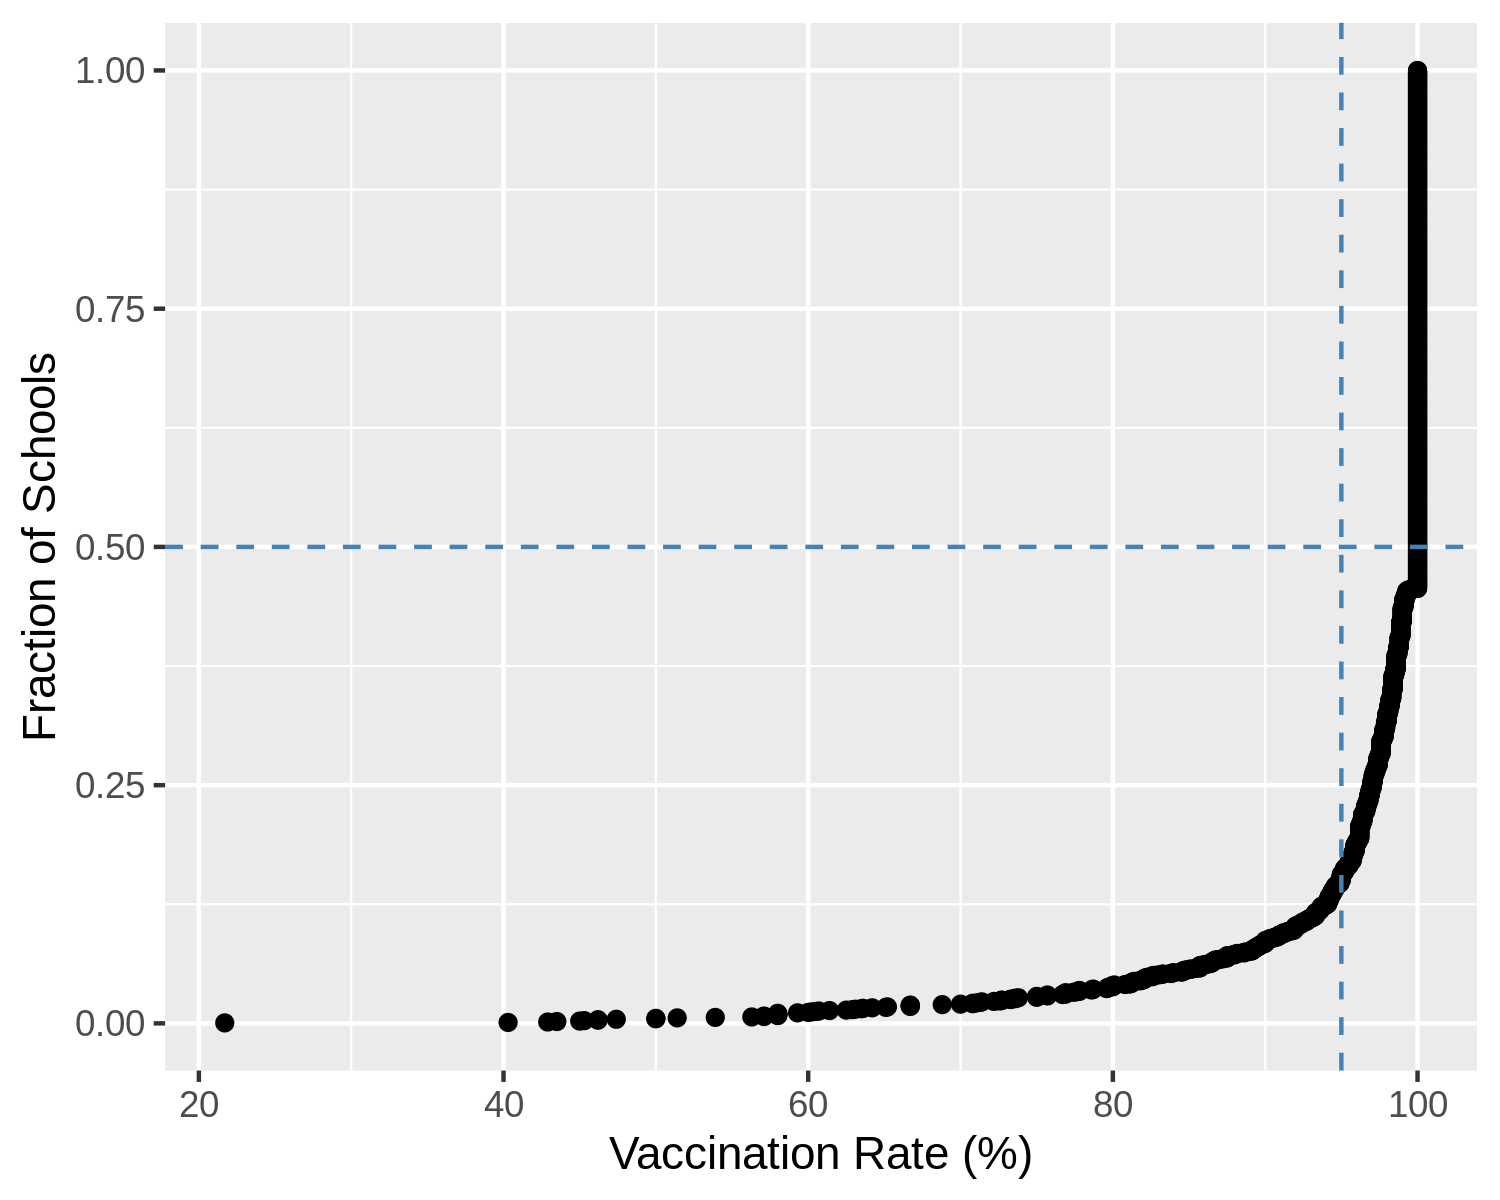

In [35]:
p = ggplot(df_nc_vacc_rates, aes(x = overall, y = frac_overall))
p = p + geom_point() + 
        labs(x = "Vaccination Rate (%)", y = "Fraction of Schools") +
        geom_vline(xintercept = 95, linetype="dashed", color = "steelblue") +
        geom_hline(yintercept = 0.50, linetype="dashed", color = "steelblue")
p

(My solution is below if you want to peek 👀. Uncomment the code, change the cell to `markdown`, and exectute it.)

![](https://github.com/chuckpr/BIOS512/blob/main/assignments/measles-chart.png?raw=true)

Is the median vaccination rate for NC schools above the CDC recommended target?

The median vaccination rate for NC schools is above the CDC recommended target.